## Assignment : 14

<pre>
1. Download the preprocessed DonorsChoose data from here <a href='https://drive.google.com/file/d/1GU3LIJJ3zS1xLXXe-sdItSJHtI5txjVO/view?usp=sharing'>Dataset</a>
2. Split the data into train, cv, and test
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a href='https://datascience.stackexchange.com/a/20192'>this</a> for using auc as a metric. you need to print the AUC value for each epoch. Note: you should NOT use the tf.metric.auc
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum, resources: <a href='http://cs231n.github.io/neural-networks-3/'>cs231n class notes</a>, <a href='https://www.youtube.com/watch?v=hd_KFJ5ktUc'>cs231n class video</a>. 
7. You should Save the best model weights.
8. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in .ipynb notebook and PDF. 
9. Use Categorical Cross Entropy as Loss to minimize.
10. try to get AUC more than 0.75 for atleast one model
</pre>

### Model-1

Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



- For LSTM, you can choose your sequence padding methods on your own or you can train your LSTM without padding, there is no restriction on that.

Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

In [3]:
''''# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
input_layer = Input(shape=(n,))
embedding = Embedding(no_1, no_2, input_length=n)(input_layer)
flatten = Flatten()(embedding)'''

"'# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work\ninput_layer = Input(shape=(n,))\nembedding = Embedding(no_1, no_2, input_length=n)(input_layer)\nflatten = Flatten()(embedding)"

### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path_train="/content/drive/My Drive/Colab Notebooks/preprocessed_data.csv"

In [6]:
#importing all the required lib
import pandas as pd
import numpy as np 
import os
import math
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import SpatialDropout1D, LSTM, BatchNormalization,concatenate,Flatten,Embedding,Dense,Dropout,MaxPooling2D,Reshape,CuDNNLSTM
from keras.models import Sequential
from keras import Model,Input
from keras.layers.convolutional import Conv2D,Conv1D
import keras.backend as k
from sklearn.metrics import roc_auc_score
import tensorflow as tf
import keras
from sklearn.utils import compute_class_weight
from keras.initializers import he_normal,glorot_normal
from keras.regularizers import l1,l2
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint,LearningRateScheduler
from time import time
from keras.callbacks import TensorBoard

from IPython.display import SVG, display
import pickle 
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [0]:
project_data=pd.read_csv(path_train)

In [8]:
project_data.shape

(109248, 10)

In [9]:
project_data.head(1)

,school_state,teacher_prefix,project_grade_category,Unnamed: 3,clean_categories,clean_subcategories,essay,price,teacher_number_of_previously_posted_projects,project_is_approved
0,ca,mrs,grades_prek_2,NaN,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,53,1


In [0]:
class_label = project_data['project_is_approved']
class_wght = compute_class_weight("balanced", classes= np.unique(class_label),y=class_label)

In [0]:
y_label = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'],axis=1,inplace=True)
x_train, x_test, y_train, y_test = train_test_split(project_data, y_label, stratify=y_label, test_size=0.3)

In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [13]:
token = Tokenizer()
token.fit_on_texts(x_train['essay'])
vocabulary_length = len(token.word_index) + 1
print('Total unique words in the x_train',vocabulary_length)
encoded_seq_train = token.texts_to_sequences(x_train['essay'])
encoded_seq_test = token.texts_to_sequences(x_test['essay'])


Total unique words in the x_train 49152


In [0]:
size = []
for sent in encoded_seq_train:
    size.append(len(sent))

s = list(set(size))
count = []
for i in s:
    count.append(size.count(i))

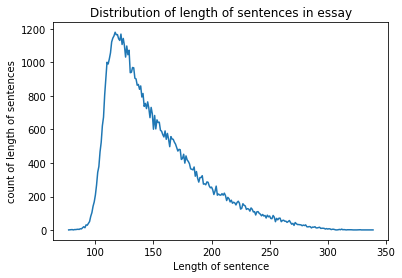

In [15]:
plt.plot(s,count)
plt.xlabel('Length of sentence')
plt.ylabel('count of length of sentences')
plt.title('Distribution of length of sentences in essay')
plt.show()

For padding the sequence we need to find est length which covers most of the length and we have found that around 95% of information is covered within length of 300.
so we can take maximum length=300 for padding.
2.We will do post padding

```
# This is formatted as code
```



padding the encoded sequence

In [0]:
max_size = 300
pad_train = pad_sequences(encoded_seq_train, maxlen=max_size, padding='post')
pad_test = pad_sequences(encoded_seq_test, maxlen=max_size, padding='post')

In [17]:
print(len(pad_train[10]))
print(len(pad_test[1000]))

300
300


In [18]:
len(pad_train)

76473

In [19]:
len(pad_test)

32775

In [20]:
"""essay is vectorized into 300 dimension"""

'essay is vectorized into 300 dimension'

In [0]:
tokenizing words using glove model

In [0]:
import pickle

from tqdm import tqdm
import os

In [0]:
import io
embeddings_index = {}
with io.open('/content/drive/My Drive/Colab Notebooks/glove_vectors','rb') as f:
  model = pickle.load(f)
  glove_words =  set(model.keys())
    
# for train
embedded_vector_train = np.zeros((vocabulary_length,300))
for word, i in token.word_index.items():
    if word in glove_words:
        embedded_vector = model[word]
        embedded_vector_train[i] = embedded_vector

        

In [23]:
len(embedded_vector_train[100])

300

tokenizing features

In [0]:
def tokenization(feature):
    all_words = list(feature)
    distinct_words = list(set(feature))
    length = len(distinct_words)
    count = []
    for cat in distinct_words:
        count.append([all_words.count(cat),cat])
    count.sort()
    rank = {}
    for i in range(1,len(count)+1):
        rank.update({count[i-1][1] : i})
    return (rank,distinct_words,length)

Tokenizing clean categories, clean sub categories,state,techer prefix,project grade categories,essay

In [25]:
cty_rank,distinct_words,cty_length = tokenization(x_train['clean_categories'])
print(cty_rank)
print(distinct_words)
print(cty_length)

{'music_arts warmth care_hunger': 1, 'literacy_language warmth care_hunger': 2, 'music_arts appliedlearning': 3, 'appliedlearning warmth care_hunger': 4, 'history_civics health_sports': 5, 'math_science warmth care_hunger': 6, 'music_arts history_civics': 7, 'health_sports warmth care_hunger': 8, 'music_arts health_sports': 9, 'specialneeds warmth care_hunger': 10, 'health_sports history_civics': 11, 'specialneeds health_sports': 12, 'history_civics appliedlearning': 13, 'literacy_language health_sports': 14, 'music_arts specialneeds': 15, 'health_sports music_arts': 16, 'health_sports appliedlearning': 17, 'appliedlearning history_civics': 18, 'history_civics specialneeds': 19, 'health_sports math_science': 20, 'history_civics math_science': 21, 'history_civics music_arts': 22, 'specialneeds music_arts': 23, 'math_science health_sports': 24, 'appliedlearning health_sports': 25, 'literacy_language appliedlearning': 26, 'math_science history_civics': 27, 'appliedlearning music_arts': 28

In [26]:

enc_cty_train = []
enc_cty_test = []
clean_cat=x_train['clean_categories']
clean_cat1=x_test['clean_categories']
for cat in clean_cat:
    enc_cty_train.append(cty_rank[cat])

for cat in clean_cat1:
    if cat in distinct_words:
        enc_cty_test.append(cty_rank[cat]) 
    else:
        enc_cty_test.append(0) 
    
enc_cty_train = np.asarray(enc_cty_train)
enc_cty_test = np.asarray(enc_cty_test)

print(enc_cty_train[0])
print(enc_cty_test[100])

49
46


In [27]:
sub_cty_rank,distinct_words,sub_cty_length = tokenization(x_train['clean_subcategories'])
print(sub_cty_rank)
print(distinct_words)
print(sub_cty_length)
enc_sub_cty_train = []
enc_sub_cty_test = []
clean_sub_cat=x_train['clean_subcategories']
clean_sub_cat1=x_test['clean_subcategories']
for cat in clean_sub_cat:
    enc_sub_cty_train.append(sub_cty_rank[cat])

for cat in clean_sub_cat1:
    if cat in distinct_words:
        enc_sub_cty_test.append(sub_cty_rank[cat]) 
    else:
        enc_sub_cty_test.append(0) 
    
enc_sub_cty_train = np.asarray(enc_sub_cty_train)
enc_sub_cty_test = np.asarray(enc_sub_cty_test)

print(enc_sub_cty_train[0])
print(enc_sub_cty_test[100])


{'civics_government extracurricular': 1, 'civics_government foreignlanguages': 2, 'civics_government nutritioneducation': 3, 'civics_government parentinvolvement': 4, 'civics_government teamsports': 5, 'college_careerprep teamsports': 6, 'college_careerprep warmth care_hunger': 7, 'communityservice financialliteracy': 8, 'communityservice music': 9, 'economics literature_writing': 10, 'economics nutritioneducation': 11, 'economics other': 12, 'environmentalscience teamsports': 13, 'esl economics': 14, 'esl nutritioneducation': 15, 'esl teamsports': 16, 'extracurricular financialliteracy': 17, 'financialliteracy foreignlanguages': 18, 'financialliteracy health_wellness': 19, 'financialliteracy parentinvolvement': 20, 'financialliteracy performingarts': 21, 'financialliteracy socialsciences': 22, 'foreignlanguages gym_fitness': 23, 'gym_fitness parentinvolvement': 24, 'gym_fitness socialsciences': 25, 'gym_fitness warmth care_hunger': 26, 'parentinvolvement teamsports': 27, 'parentinvolv

In [28]:
state_rank,distinct_words,state_length = tokenization(x_train['school_state'])
print(state_rank)
print(distinct_words)
print(state_length)
enc_state_train = []
enc_state_test = []
clean_state=x_train['school_state']
clean_state1=x_test['school_state']
for cat in clean_state:
    enc_state_train.append(state_rank[cat])

for cat in clean_state1:
    if cat in distinct_words:
        enc_state_test.append(state_rank[cat]) 
    else:
        enc_state_test.append(0) 
    
enc_state_train = np.asarray(enc_state_train)
enc_state_test = np.asarray(enc_state_test)

print(enc_state_train[0])
print(enc_state_test[100])

{'vt': 1, 'wy': 2, 'nd': 3, 'mt': 4, 'ne': 5, 'ri': 6, 'sd': 7, 'de': 8, 'nh': 9, 'ak': 10, 'me': 11, 'hi': 12, 'wv': 13, 'dc': 14, 'nm': 15, 'ks': 16, 'ia': 17, 'id': 18, 'ar': 19, 'co': 20, 'mn': 21, 'or': 22, 'ky': 23, 'ms': 24, 'nv': 25, 'md': 26, 'tn': 27, 'ct': 28, 'ut': 29, 'al': 30, 'wi': 31, 'va': 32, 'az': 33, 'nj': 34, 'wa': 35, 'ok': 36, 'la': 37, 'ma': 38, 'oh': 39, 'mo': 40, 'in': 41, 'pa': 42, 'mi': 43, 'ga': 44, 'sc': 45, 'il': 46, 'nc': 47, 'fl': 48, 'ny': 49, 'tx': 50, 'ca': 51}
['al', 'ma', 'in', 'tn', 'me', 'dc', 'id', 'wv', 'pa', 'hi', 'wy', 'co', 'ca', 'ak', 'nm', 'va', 'nv', 'ky', 'or', 'mt', 'mo', 'sc', 'ks', 'ny', 'ga', 'vt', 'tx', 'ut', 'mi', 'ar', 'fl', 'ri', 'de', 'ok', 'sd', 'la', 'az', 'nh', 'oh', 'wa', 'nj', 'ne', 'mn', 'ia', 'nc', 'wi', 'il', 'ms', 'nd', 'md', 'ct']
51
19
47


In [29]:
teacher_rank,distinct_words,teacher_length = tokenization(x_train['teacher_prefix'])
print(teacher_rank)
print(distinct_words)
print(teacher_length)
enc_teacher_train = []
enc_teacher_test = []
clean_teacher=x_train['teacher_prefix']
clean_teacher1=x_test['teacher_prefix']
for cat in clean_teacher:
    enc_teacher_train.append(teacher_rank[cat])

for cat in clean_teacher1:
    if cat in distinct_words:
        enc_teacher_test.append(teacher_rank[cat]) 
    else:
        enc_teacher_test.append(0) 
    
enc_teacher_train = np.asarray(enc_teacher_train)
enc_teacher_test = np.asarray(enc_teacher_test)

print(enc_teacher_train[0])
print(enc_teacher_test[100])

{'dr': 1, 'teacher': 2, 'mr': 3, 'ms': 4, 'mrs': 5}
['mr', 'dr', 'teacher', 'ms', 'mrs']
5
5
5


In [30]:
pgc_rank,distinct_words,pgc_length = tokenization(x_train['project_grade_category'])
print(pgc_rank)
print(distinct_words)
print(pgc_length)
enc_pgc_train = []
enc_pgc_test = []
clean_pgc=x_train['project_grade_category']
clean_pgc1=x_test['project_grade_category']
for cat in clean_pgc:
    enc_pgc_train.append(pgc_rank[cat])

for cat in clean_pgc1:
    if cat in distinct_words:
        enc_pgc_test.append(pgc_rank[cat]) 
    else:
        enc_pgc_test.append(0) 
    
enc_pgc_train = np.asarray(enc_pgc_train)
enc_pgc_test = np.asarray(enc_pgc_test)

print(enc_pgc_train[0])
print(enc_pgc_test[100])

{'grades_9_12': 1, 'grades_6_8': 2, 'grades_3_5': 3, 'grades_prek_2': 4}
['grades_6_8', 'grades_3_5', 'grades_9_12', 'grades_prek_2']
4
4
3


Standardizing train and test data

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train['price'].values.reshape(-1,1))
x_train_price= scaler.transform(x_train['price'].values.reshape(-1,1))
x_test_price= scaler.transform(x_test['price'].values.reshape(-1,1))
print(x_train_price.shape, y_train.shape)
print(x_test_price.shape, y_test.shape)

(76473, 1) (76473, 2)
(32775, 1) (32775, 2)


In [32]:
scaler.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_train_ppp= scaler.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_test_ppp= scaler.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print(x_train_ppp.shape, y_train.shape)
print(x_test_ppp.shape, y_test.shape)

(76473, 1) (76473, 2)
(32775, 1) (32775, 2)


In [0]:
numerical_train = np.hstack((x_train_price,x_train_ppp))
numerical_test = np.hstack((x_test_price,x_test_ppp))

In [58]:
'''Defining AUC'''

'Defining AUC'

In [0]:
def auc1(y_true, y_pred):
    if len(np.unique(y_true[:,1])) == 1:
        return 0.5
    else:
        return roc_auc_score(y_true, y_pred)

def auc(y_true, y_pred):
    return tf.py_func(auc1, (y_true, y_pred), tf.double)

TensorBoard installation

In [35]:
!pip install tensorboardcolab

In [36]:
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

tbc=TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
https://0bacd753.ngrok.io


LSTM MODEL 1-Architecture

In [0]:
keras.backend.clear_session()
essay = Input(shape=(300,), name='essay_input')
x1 = Embedding(vocabulary_length, 300, weights=[embedded_vector_train], input_length=300)(essay)
lstm_out = LSTM(100,recurrent_dropout=0.5,return_sequences=True)(x1)
flatten_1 = Flatten()(lstm_out)

state = Input(shape=(1,), name='school_state')
x2 = Embedding(state_length,5, input_length=1)(state)
flatten_2 = Flatten()(x2)


pgc = Input(shape=(1,), name='project_grade_category')
x3 = Embedding(pgc_length,5, input_length=1)(pgc)
flatten_3 = Flatten()(x3)


clean_cty = Input(shape=(1,), name='clean_categories')
x4 = Embedding(cty_length,5, input_length=1)(clean_cty)
flatten_4 = Flatten()(x4)


clean_sub_cty = Input(shape=(1,), name='clean_sub_categories')
x5 = Embedding(sub_cty_length,5, input_length=1)(clean_sub_cty)
flatten_5 = Flatten()(x5)


teacher= Input(shape=(1,), name='teacher_prefix')
x6 = Embedding(teacher_length,5, input_length=1)(teacher)
flatten_6 = Flatten()(x6)


numerical_input = Input(shape=(2,), name='remaining_input')
dense_1 = Dense(16, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.01))(numerical_input)



x = concatenate([flatten_1,flatten_2,flatten_3,flatten_4,flatten_5,flatten_6,dense_1])

x = Dense(128, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.001))(x)
x = Dropout(.5)(x)
x = Dense(64, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.001))(x)
x = Dropout(.5)(x)
x = BatchNormalization()(x)

x = Dense(32, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.001))(x)
output = Dense(2, activation='softmax')(x)

model1 = Model(inputs=[essay,state,pgc,clean_cty,clean_sub_cty,teacher,numerical_input], outputs=[output])
model1.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0006,decay = 1e-4),metrics=[auc])
print(model1.summary())












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to     

In [0]:
train_1 = [pad_train,enc_cty_train,enc_sub_cty_train,enc_state_train,enc_pgc_train,enc_teacher_train,numerical_train]
test_1 = [pad_test,enc_cty_test,enc_sub_cty_test,enc_state_test,enc_pgc_test,enc_teacher_test,numerical_test]

In [0]:
print(pad_train.shape)
print(enc_cty_train.shape)
print(enc_sub_cty_train.shape)
print(enc_state_train.shape)
print(enc_pgc_train.shape)
print(enc_teacher_train.shape)
print(numerical_train.shape)


(76473, 300)
(76473,)
(76473,)
(76473,)
(76473,)
(76473,)
(76473, 2)


In [0]:
print(pad_test.shape)
print(enc_cty_test.shape)
print(enc_sub_cty_test.shape)
print(enc_state_test.shape)
print(enc_pgc_test.shape)
print(enc_teacher_test.shape)
print(numerical_test.shape)

(32775, 300)
(32775,)
(32775,)
(32775,)
(32775,)
(32775,)
(32775, 2)


In [0]:
#model fitting
#https://machinelearningmastery.com/check-point-deep-learning-models-keras/
filepath="weights_copy.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_auc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint,TensorBoardColabCallback(tbc)]
model1.fit(train_1, y_train,epochs=5,verbose=1,batch_size=256,callbacks =callbacks_list,validation_data=(test_1, y_test),class_weight = class_wght )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 76473 samples, validate on 32775 samples


Epoch 1/5
76473/76473 [==============================] - 186s 2ms/step - loss: 0.9272 - auc: 0.5910 - val_loss: 0.8525 - val_auc: 0.6968

Epoch 00001: val_auc improved from -inf to 0.69684, saving model to weights_copy.best.hdf5

Epoch 2/5
76473/76473 [==============================] - 185s 2ms/step - loss: 0.6972 - auc: 0.7208 - val_loss: 0.7029 - val_auc: 0.7413

Epoch 00002: val_auc improved from 0.69684 to 0.74131, saving model to weights_copy.best.hdf5
Epoch 3/5
76473/76473 [==============================] - 183s 2ms/step - loss: 0.5952 - auc: 0.7669 - val_loss: 0.6281 - val_auc: 0.7520

Epoch 00003: val_auc improved from 0.74131 to 0.75196, saving model to weights_copy.best.hdf5
Epoch 4/5
76473/76473 [==============================] - 179s 2ms/step - loss: 0.5285 - auc: 0.7992 - val_loss: 0.5556 - val_auc: 0.7497

Epoch 00004: val_auc

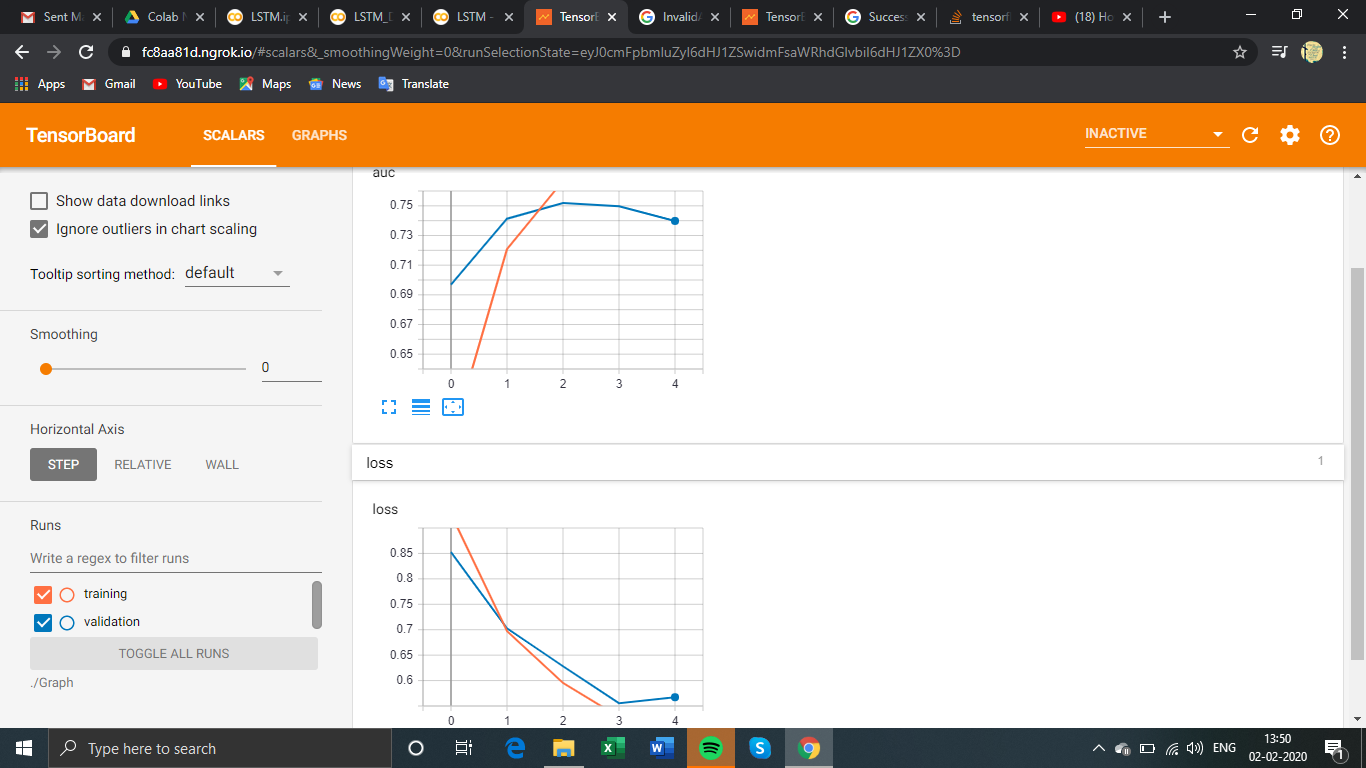

In [0]:
from IPython.display import Image
Image(retina=True, filename='/content/drive/My Drive/m1.png')

auc graph:

Blue curve validation AUC: 0.75196

Red curve  Train AUC :0.7669

### Model-2

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Train the TF-IDF on the Train data feature 'essay' <br>
2. Get the idf value for each word we have in the train data. <br>
3. Remove the low idf value and high idf value words from our data. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very frequent words and very very rare words don't give much information. (you can plot a box plots and take only the idf scores within IQR range and corresponding words)<br>
4. Train the LSTM after removing the Low and High idf value words. (In model-1 Train on total data but in Model-2 train on data after removing some words based on IDF values)
</pre>

Performing tfid vectorization on essay data

In [0]:
vectorizer = TfidfVectorizer(min_df=10)
x_tfidf_train = vectorizer.fit_transform(x_train['essay'].values)
print(x_tfidf_train.shape)

(76473, 14523)


visualizing idf values using box plot to remove redundant and rare words

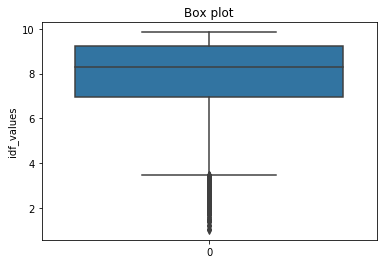

In [0]:
import seaborn as sns
idf_values = vectorizer.idf_
sns.boxplot(data=idf_values)
plt.title('Box plot')
plt.ylabel('idf_values')
plt.show()

Filtering words

In [0]:
features = np.asarray(vectorizer.get_feature_names()) 

f_i = []
for i in range(len(idf_values)):
    if idf_values[i] >= 5 and idf_values[i] <=9:
        f_i.append(i)
        
filtered_words = []
for i in f_i:
    filtered_words.append(features[i])

In [0]:
print('all words = ', len(features))
print('Filtered words = ',len(filtered_words))

all words =  14523
Filtered words =  8900


In [0]:
# keeping words present in filtered words in train_data
from tqdm import tqdm 
x_tfidf_train_new = []
for sent in tqdm(x_train['essay']):
    line = []
    for word in sent.split():
        if word in filtered_words:
            line.append(word)      
    x_tfidf_train_new.append(' '.join(line))

#keeping words present in filtered data in test_data
x_tfidf_test_new = []
for sent in tqdm(x_test['essay']):
    line = []
    for word in sent.split():
        if word in filtered_words:
            line.append(word)    
    x_tfidf_test_new.append(' '.join(line))

print(len(x_tfidf_train_new))
print(len(x_tfidf_test_new))

100%|██████████| 32775/32775 [08:21<00:00, 65.30it/s]

76473
32775


tokenizing the idf sentences

In [0]:
token_tfidf = Tokenizer()
token_tfidf.fit_on_texts(x_tfidf_train_new)
vocabulary_length = len(token_tfidf.word_index) + 1
print('Total distinct words present in the x_tfidf_train_new',vocabulary_length)
enc_tfidf_train_new = token_tfidf.texts_to_sequences(x_tfidf_train_new)
enc_tfidf_test_new = token_tfidf.texts_to_sequences(x_tfidf_test_new)

Total distinct words present in the x_tfidf_train_new 8901


Padding

In [0]:
max_size = 300
pad_tfidf_train = pad_sequences(enc_tfidf_train_new, maxlen=max_size, padding='post')
pad_tfidf_test = pad_sequences(enc_tfidf_test_new, maxlen=max_size, padding='post')
print(len(pad_tfidf_train[10]))
print(len(pad_tfidf_test[1000]))

300
300


In [0]:
# for train
embedded_vector_train_2 = np.zeros((vocabulary_length,300))
for word, i in token_tfidf.word_index.items():
    if word in glove_words:
        embedded_vector = model[word]
        embedded_vector_train_2[i] = embedded_vector


In [0]:
vocabulary_length

8901

Model architecture 2:

In [0]:
keras.backend.clear_session()
essay = Input(shape=(300,), name='essay_input')
x1 = Embedding(vocabulary_length, 300, weights=[embedded_vector_train_2], input_length=300)(essay)
lstm_out = LSTM(100,recurrent_dropout=0.5,return_sequences=True)(x1)
flatten_1 = Flatten()(lstm_out)

state = Input(shape=(1,), name='school_state')
x2 = Embedding(state_length,5, input_length=1)(state)
flatten_2 = Flatten()(x2)


pgc = Input(shape=(1,), name='project_grade_category')
x3 = Embedding(pgc_length,5, input_length=1)(pgc)
flatten_3 = Flatten()(x3)


clean_cty = Input(shape=(1,), name='clean_categories')
x4 = Embedding(cty_length,5, input_length=1)(clean_cty)
flatten_4 = Flatten()(x4)


clean_sub_cty = Input(shape=(1,), name='clean_sub_categories')
x5 = Embedding(sub_cty_length,5, input_length=1)(clean_sub_cty)
flatten_5 = Flatten()(x5)


teacher= Input(shape=(1,), name='teacher_prefix')
x6 = Embedding(teacher_length,5, input_length=1)(teacher)
flatten_6 = Flatten()(x6)


numerical_input = Input(shape=(2,), name='remaining_input')
dense_1 = Dense(16, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.01))(numerical_input)



x = concatenate([flatten_1,flatten_2,flatten_3,flatten_4,flatten_5,flatten_6,dense_1])

x = Dense(128, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.001))(x)
x = Dropout(.5)(x)
x = Dense(64, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.001))(x)
x = Dropout(.5)(x)
x = BatchNormalization()(x)

x = Dense(32, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.001))(x)
output = Dense(2, activation='softmax')(x)

model2 = Model(inputs=[essay,state,pgc,clean_cty,clean_sub_cty,teacher,numerical_input], outputs=[output])
tensorboard = TensorBoard(log_dir="logs".format(time()))
model2.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0006,decay = 1e-4),metrics=[auc])
print(model2.summary())












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to     

In [0]:
train_2 = [pad_tfidf_train,enc_cty_train,enc_sub_cty_train,enc_state_train,enc_pgc_train,enc_teacher_train,numerical_train]
test_2 = [pad_tfidf_test,enc_cty_test,enc_sub_cty_test,enc_state_test,enc_pgc_test,enc_teacher_test,numerical_test]

In [0]:
print(pad_tfidf_train.shape)
print(enc_cty_train.shape)
print(enc_sub_cty_train.shape)
print(enc_state_train.shape)
print(enc_pgc_train.shape)
print(enc_teacher_train.shape)
print(numerical_train.shape)

(76473, 300)
(76473,)
(76473,)
(76473,)
(76473,)
(76473,)
(76473, 2)


In [0]:
print(pad_tfidf_test.shape)
print(enc_cty_test.shape)
print(enc_sub_cty_test.shape)
print(enc_state_test.shape)
print(enc_pgc_test.shape)
print(enc_teacher_test.shape)
print(numerical_test.shape)

(32775, 300)
(32775,)
(32775,)
(32775,)
(32775,)
(32775,)
(32775, 2)


In [0]:
filepath="weights_copy2.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_auc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint,tbCallBack]
model2.fit(train_2, y_train,epochs=5,verbose=1,batch_size=256,callbacks =callbacks_list,validation_data=(test_2, y_test),class_weight = class_wght )

Train on 76473 samples, validate on 32775 samples
Epoch 1/5
76473/76473 [==============================] - 177s 2ms/step - loss: 0.5215 - auc: 0.7281 - val_loss: 0.5292 - val_auc: 0.6698

Epoch 00001: val_auc improved from -inf to 0.66984, saving model to weights_copy2.best.hdf5
Epoch 2/5
76473/76473 [==============================] - 173s 2ms/step - loss: 0.4755 - auc: 0.7562 - val_loss: 0.5072 - val_auc: 0.6784

Epoch 00002: val_auc improved from 0.66984 to 0.67841, saving model to weights_copy2.best.hdf5
Epoch 3/5
76473/76473 [==============================] - 173s 2ms/step - loss: 0.4384 - auc: 0.7834 - val_loss: 0.5024 - val_auc: 0.6603

Epoch 00003: val_auc did not improve from 0.67841
Epoch 4/5
76473/76473 [==============================] - 171s 2ms/step - loss: 0.3975 - auc: 0.8089 - val_loss: 0.4980 - val_auc: 0.6630

Epoch 00004: val_auc did not improve from 0.67841
Epoch 5/5
76473/76473 [==============================] - 172s 2ms/step - loss: 0.3594 - auc: 0.8339 - val_loss:

Train AUC and loss:

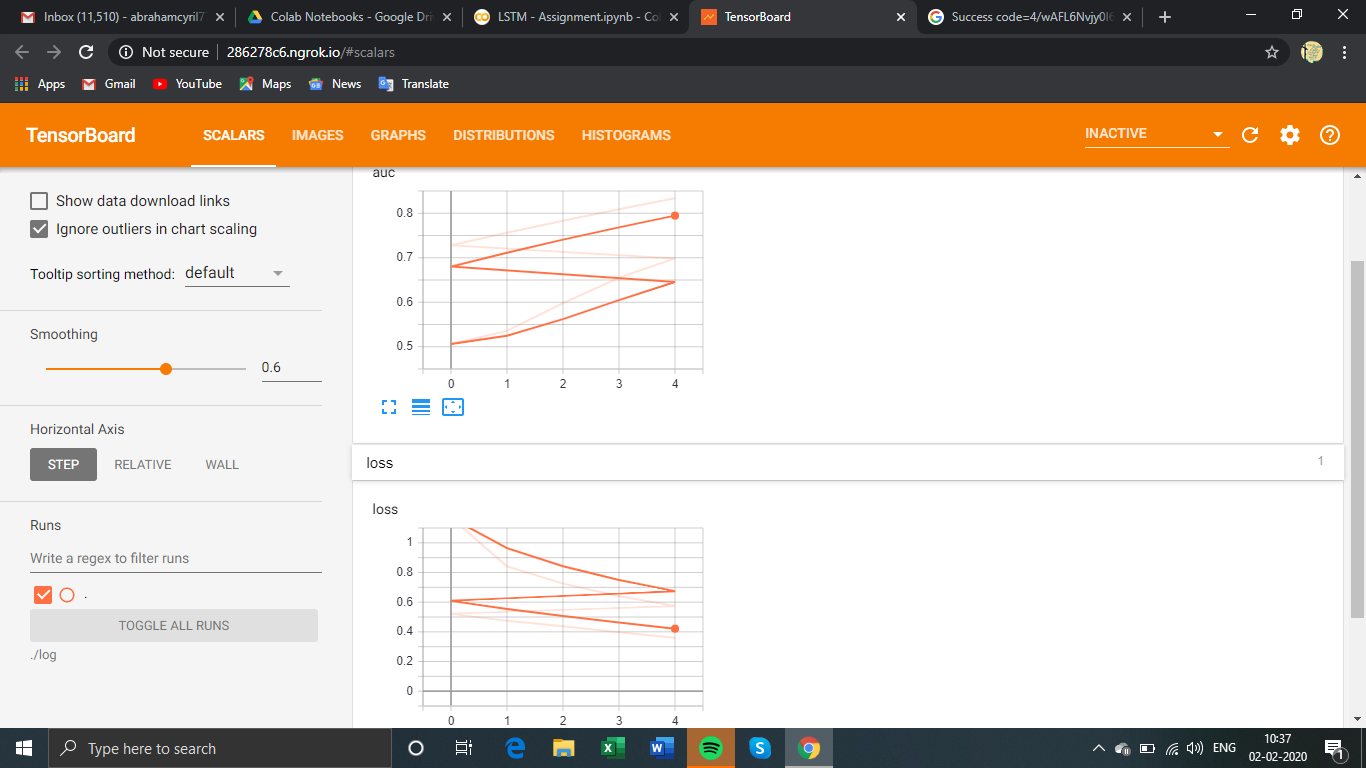

In [0]:
Image(retina=True, filename='/content/drive/My Drive/Colab Notebooks/train_auc_2.png')

Validation AUC and loss

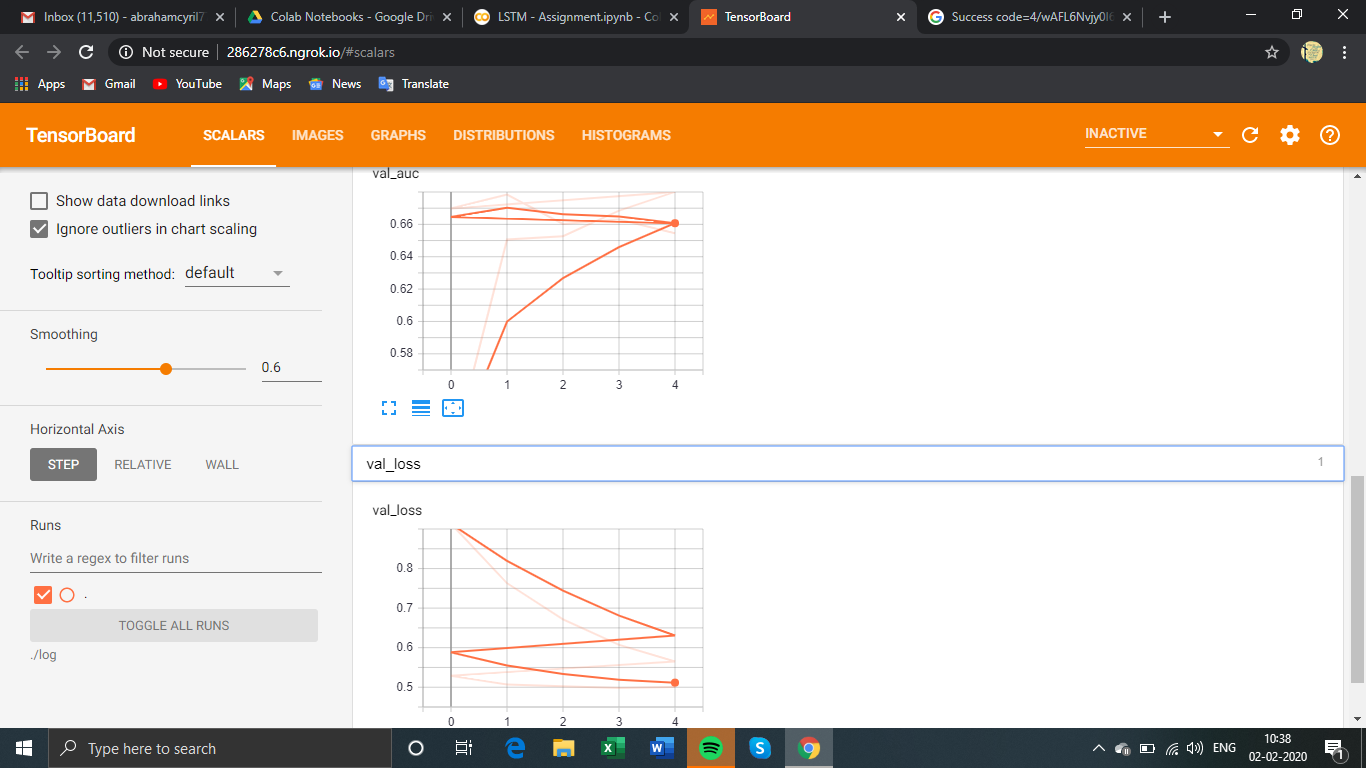

In [0]:
Image(retina=True, filename='/content/drive/My Drive/Colab Notebooks/val_auc_2.png')

### Model-3

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png


- __input_seq_total_text_data__: <br>
<pre>
    . Use text column('essay'), and use the Embedding layer to get word vectors. <br>
    . Use given predefined glove word vectors, don't train any word vectors. <br>
    . Use LSTM that is given above, get the LSTM output and Flatten that output. <br>
    . You are free to preprocess the input text as you needed. <br>
</pre>
- __Other_than_text_data__:<br>
<pre>
    . Convert all your Categorical values to onehot coded and then concatenate all these onehot vectors <br>
    . Neumerical values and use <a href='https://keras.io/getting-started/sequential-model-guide/#sequence-classification-with-1d-convolutions'>CNN1D</a> as shown in above figure. <br>
    . You are free to choose all CNN parameters like kernel sizes, stride.<br>
    
</pre>

For essay the processing is same as for we did for first model.

Tokenizing subject category,subcategory,teacher prefix,state,project grade categories using *countvectorizer*

In [37]:
token_cat= CountVectorizer()

# integer encode the documents
proj_cat_train = token_cat.fit_transform(x_train['clean_categories'])
proj_cat_test = token_cat.transform(x_test['clean_categories'])


print(proj_cat_train.shape)
print(proj_cat_test.shape)



(76473, 9)
(32775, 9)


In [38]:
token_sub_cat = CountVectorizer()


subcat_train = token_sub_cat.fit_transform(x_train['clean_subcategories'])
subcat_test = token_sub_cat.transform(x_test['clean_subcategories'])

print(subcat_train.shape)
print(subcat_test.shape)


(76473, 30)
(32775, 30)


In [39]:
token_state = CountVectorizer()

# integer encode the documents
state_train = token_state.fit_transform(x_train['school_state'])
state_test = token_state.transform(x_test['school_state'])


print(state_train.shape)
print(state_test.shape)


(76473, 51)
(32775, 51)


In [40]:
token_pgc = CountVectorizer()

# integer encode the documents
pgc_train = token_pgc.fit_transform(x_train['project_grade_category'])
pgc_test = token_pgc.transform(x_test['project_grade_category'])


print(pgc_train.shape)
print(pgc_test.shape)


(76473, 4)
(32775, 4)


In [41]:
token_teacher = CountVectorizer()
# integer encode the documents
teacher_train = token_teacher.fit_transform(x_train['teacher_prefix'])
teacher_test = token_teacher.transform(x_test['teacher_prefix'])

print(teacher_train.shape)
print(teacher_test.shape)


(76473, 5)
(32775, 5)


In [42]:
print(pad_train.shape)
print(proj_cat_train.shape)
print(subcat_train.shape)
print(state_train.shape)
print(pgc_train.shape)
print(teacher_train.shape)
print(numerical_train.shape)

(76473, 300)
(76473, 9)
(76473, 30)
(76473, 51)
(76473, 4)
(76473, 5)
(76473, 2)


In [0]:
from scipy.sparse import hstack

In [0]:
train_3 = hstack((proj_cat_train,subcat_train,state_train,pgc_train,teacher_train,numerical_train))
test3 = hstack((proj_cat_test,subcat_test,state_test,pgc_test,teacher_test,numerical_test))

In [45]:
train_3.shape

(76473, 101)

In [46]:
test3.shape

(32775, 101)

In [0]:
train_m3=train_3.todense()
test_m3 =test3.todense()


In [0]:
train_3 = np.resize(train_m3,new_shape=(76473,101,1))
test_3 =np.resize(test_m3,new_shape=(32775,101,1))


In [49]:
train_3.shape

(76473, 101, 1)

In [50]:
embedded_vector_train.shape[0]



49152

In [51]:
vocabulary_length

49152

defining model 3 architecture

In [52]:
essay = Input(shape=(300,), name='essay_input')#from model_1

x = Embedding(embedded_vector_train.shape[0], 300, weights=[embedded_vector_train], input_length=300)(essay)
lstm = LSTM(100,recurrent_dropout=0.5,return_sequences=True)(x)
flatten = Flatten()(lstm)


remaining_input = Input(shape=(101,1),name='rest_all') 
x = Conv1D(filters=256, kernel_size = 3, padding='valid', kernel_initializer='glorot_normal',)(remaining_input)
x = Conv1D(filters=256, kernel_size = 3, padding='valid', kernel_initializer='glorot_normal',)(x)
flatten_1 = Flatten()(x)

#concatenate
concat = concatenate([flatten,flatten_1])

x = Dense(300, activation='relu',kernel_initializer="glorot_normal",kernel_regularizer=l2(0.0001))(concat)
x = Dropout(.5)(x)
x = Dense(256, activation='relu',kernel_initializer="glorot_normal",kernel_regularizer=l2(0.0001))(x)
x = Dropout(.5)(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu',kernel_initializer="glorot_normal",kernel_regularizer=l2(0.0001))(x)
output = Dense(2, activation='softmax')(x)

model3 = Model(inputs=[essay,remaining_input], outputs=[output])
print(model3.summary())











Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
essay_input (InputLayer)        (None, 300)          0                                            
__________________________________________________________________________________________________
rest_all (InputLayer)           (None, 101, 1)       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 300, 300)     14745600    essay_input[0][0]                
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 99, 128)      512         

In [53]:

model3.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.adam(lr=0.0006,decay = 1e-4), metrics=[auc])



Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


In [0]:
train_3_n = [pad_train,train_3]
test_3_n = [pad_test,test_3]

In [55]:
#model fitting
filepath="weights_3.best_copy.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor='val_auc', verbose=1, save_best_only=True, mode='max')

earlystop = EarlyStopping(monitor = 'val_auroc', 
                            mode="max",
                            min_delta = 0, 
                            patience = 2,
                            verbose = 1,)
callbacks_list = [checkpoint,earlystop,TensorBoardColabCallback(tbc)]
model3.fit(train_3_n, y_train,epochs=5,verbose=1,batch_size=256,callbacks =callbacks_list,validation_data=(test_3_n, y_test),class_weight = class_wght )


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 76473 samples, validate on 32775 samples


Epoch 1/5
76473/76473 [==============================] - 191s 2ms/step - loss: 0.5167 - auc: 0.6181 - val_loss: 0.5017 - val_auc: 0.7296

Epoch 00001: val_auc improved from -inf to 0.72956, saving model to weights_3.best_copy.hdf5

Epoch 2/5
76473/76473 [==============================] - 181s 2ms/step - loss: 0.4511 - auc: 0.7438 - val_loss: 0.5175 - val_auc: 0.7412

Epoch 00002: val_auc improved from 0.72956 to 0.74119, saving model to weights_3.best_copy.hdf5
Epoch 3/5
76473/76473 [==============================] - 181s 2ms/step - loss: 0.4182 - auc: 0.7806 - val_loss: 0.4968 - val_auc: 0.7474

Epoch 00003: val_auc improved from 0.74119 to 0.74744, saving model to weights_3.best_copy.hdf5
Epoch 4/5
76473/76473 [==============================] - 181s 2ms/step - loss: 0.3928 - auc: 0.8106 - val_loss: 0.5531 - val_auc: 0.7537

Epoch 00004: v

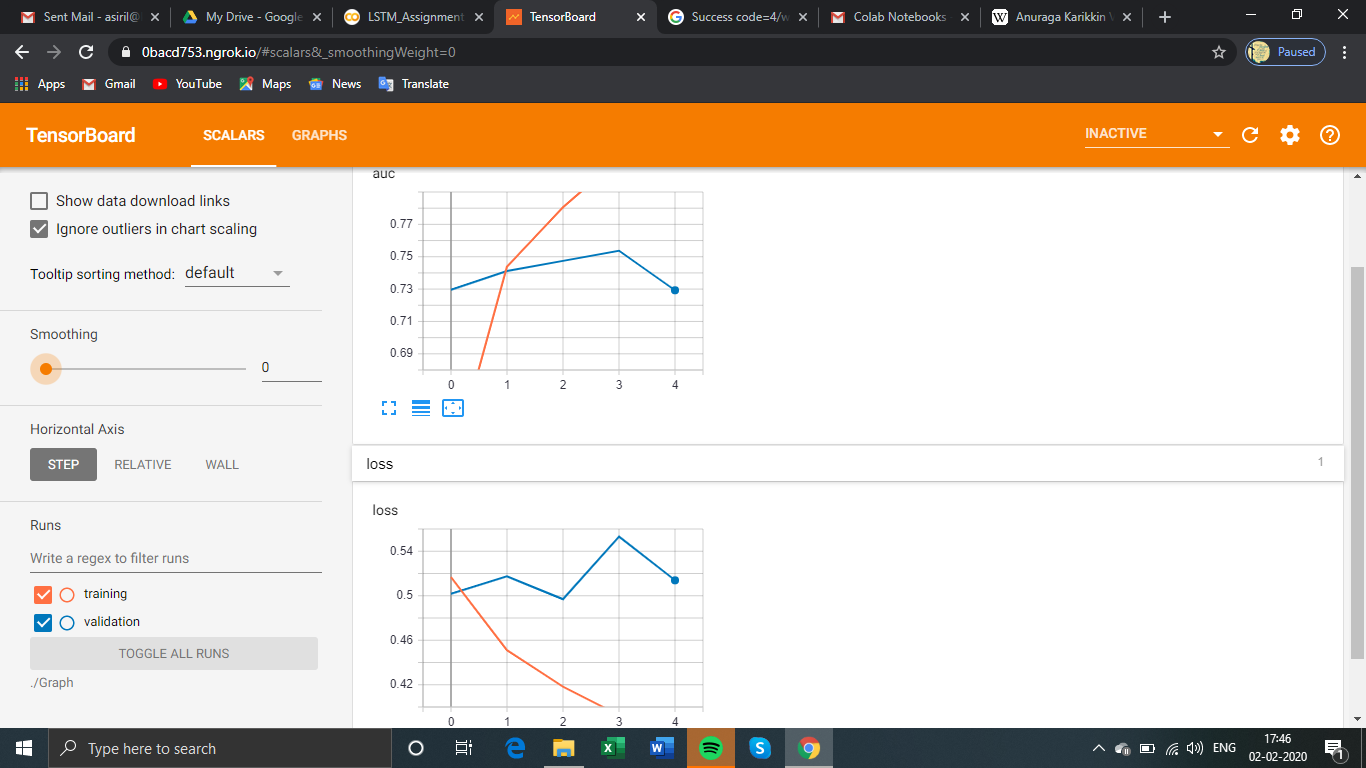

In [56]:
from IPython.display import Image
Image(retina=True, filename='/content/drive/My Drive/image.png')

In [57]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Train AUC", "Cross validation AUC"]

x.add_row(["Model 1", 0.7992,0.7520])
x.add_row(["Model 2",0.7562,0.6784] )
x.add_row(["Model 3", 0.8106, 0.7537])


print(x)

+---------+-----------+----------------------+
|  Model  | Train AUC | Cross validation AUC |
+---------+-----------+----------------------+
| Model 1 |   0.7992  |        0.752         |
| Model 2 |   0.7562  |        0.6784        |
| Model 3 |   0.8106  |        0.7537        |
+---------+-----------+----------------------+


Conclusion:

We got 2 models that have cross validation AUC above 0.75